In [23]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import pandas as pd

In [24]:
# 读取数据文件
data1 = pd.read_excel("附件1-商家历史出货量表.xlsx")
data2 = pd.read_excel("附件2-商品信息表.xlsx")
data3 = pd.read_excel("附件3-商家信息表.xlsx")
data4 = pd.read_excel("附件4-仓库信息表.xlsx")  

In [25]:
data1

,seller_no,product_no,warehouse_no,date,qty
0,seller_19,product_448,wh_30,2023-05-09,10.0
1,seller_19,product_448,wh_30,2023-04-17,14.0
2,seller_19,product_448,wh_30,2023-01-09,2.0
3,seller_19,product_448,wh_30,2023-01-20,1.0
4,seller_19,product_448,wh_30,2023-02-13,22.0
...,...,...,...,...,...
331331,seller_31,product_1015,wh_52,2023-01-20,1.0
331332,seller_31,product_1015,wh_52,2023-01-13,6.0
331333,seller_31,product_1015,wh_52,2023-01-12,3.0
331334,seller_31,product_1015,wh_52,2023-01-22,0.0


In [26]:
# 合并数据文件
data=pd.merge(data1,data2)
data=pd.merge(data,data3)
data=pd.merge(data,data4)
data

,seller_no,product_no,warehouse_no,date,qty,category1,category2,category3,seller_category,inventory_category,seller_level,warehouse _category,warehouse _region
0,seller_19,product_448,wh_30,2023-05-09,10.0,手机通讯,手机配件,手机配件_12,数码,C,Large,中心仓,华南
1,seller_19,product_448,wh_30,2023-04-17,14.0,手机通讯,手机配件,手机配件_12,数码,C,Large,中心仓,华南
2,seller_19,product_448,wh_30,2023-01-09,2.0,手机通讯,手机配件,手机配件_12,数码,C,Large,中心仓,华南
3,seller_19,product_448,wh_30,2023-01-20,1.0,手机通讯,手机配件,手机配件_12,数码,C,Large,中心仓,华南
4,seller_19,product_448,wh_30,2023-02-13,22.0,手机通讯,手机配件,手机配件_12,数码,C,Large,中心仓,华南
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340793,seller_5,product_1747,wh_7,2023-04-27,0.0,手机通讯,手机配件,手机配件_2,家居日用,B,Large,区域仓,华中
340794,seller_5,product_1747,wh_7,2022-12-24,1.0,手机通讯,手机配件,手机配件_2,家居日用,B,Large,区域仓,华中
340795,seller_5,product_1747,wh_7,2023-04-20,1.0,手机通讯,手机配件,手机配件_2,家居日用,B,Large,区域仓,华中
340796,seller_5,product_1747,wh_7,2022-12-09,0.0,手机通讯,手机配件,手机配件_2,家居日用,B,Large,区域仓,华中


In [27]:
# 对Data数据按前三列进行分组，然后按日期进行排序
data = data.sort_values(by=['seller_no', 'product_no', 'warehouse_no', 'date'])
data['qty'].interpolate(method='linear', inplace=True)
data

,seller_no,product_no,warehouse_no,date,qty,category1,category2,category3,seller_category,inventory_category,seller_level,warehouse _category,warehouse _region
209627,seller_10,product_1664,wh_13,2022-12-01,0.0,手机通讯,手机配件,手机配件_5,手机通讯,A,Large,区域仓,华南
209565,seller_10,product_1664,wh_13,2022-12-02,0.0,手机通讯,手机配件,手机配件_5,手机通讯,A,Large,区域仓,华南
209537,seller_10,product_1664,wh_13,2022-12-03,0.0,手机通讯,手机配件,手机配件_5,手机通讯,A,Large,区域仓,华南
209559,seller_10,product_1664,wh_13,2022-12-04,0.0,手机通讯,手机配件,手机配件_5,手机通讯,A,Large,区域仓,华南
209540,seller_10,product_1664,wh_13,2022-12-05,0.0,手机通讯,手机配件,手机配件_5,手机通讯,A,Large,区域仓,华南
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217625,seller_9,product_96,wh_14,2023-05-11,1.0,手机通讯,手机配件,手机配件_6,手机通讯,B,Medium,区域仓,西南
217594,seller_9,product_96,wh_14,2023-05-12,2.0,手机通讯,手机配件,手机配件_6,手机通讯,B,Medium,区域仓,西南
217573,seller_9,product_96,wh_14,2023-05-13,3.0,手机通讯,手机配件,手机配件_6,手机通讯,B,Medium,区域仓,西南
217580,seller_9,product_96,wh_14,2023-05-14,1.0,手机通讯,手机配件,手机配件_6,手机通讯,B,Medium,区域仓,西南


In [28]:
# 统计第一列（seller_no）不同值的数量
num_unique_sellers = data['seller_no'].nunique()
print(f'共有 {num_unique_sellers} 个商家。')

# 统计第二列（product_no）不同值的数量
num_unique_products = data['product_no'].nunique()
print(f'共有 {num_unique_products} 种产品。')

# 统计第三列（warehouse_no）不同值的数量
num_unique_warehouses = data['warehouse_no'].nunique()
print(f'共有 {num_unique_warehouses} 个仓库。')


共有 35 个商家。
共有 1212 种产品。
共有 54 个仓库。


有 1996 个不同的分组。


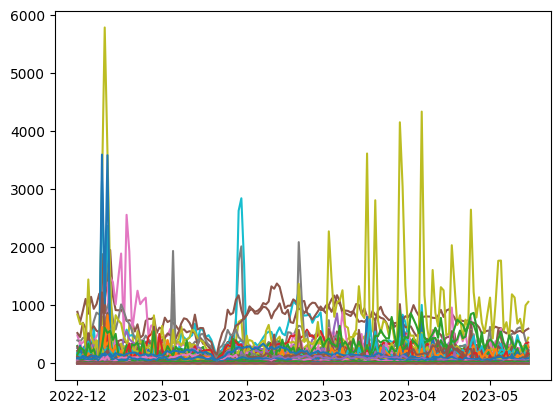

In [29]:
# 假设你的数据已经按前三列分组并按日期排序
# 你可以使用groupby来分组数据
grouped = data.groupby(['seller_no', 'product_no', 'warehouse_no'])
unique_groups = data.groupby(['seller_no', 'product_no', 'warehouse_no']).ngroups
print(f'有 {unique_groups} 个不同的分组。')

# 循环遍历每个分组并绘制折线图
for group_name, group_data in grouped:
    # 获取分组的数据
    seller, product, warehouse = group_name
    dates = group_data['date']
    quantities = group_data['qty']
    
    # 绘制折线图
    plt.plot(dates, quantities, label=f'{seller}, {product}, {warehouse}')

# 显示图形
plt.show()

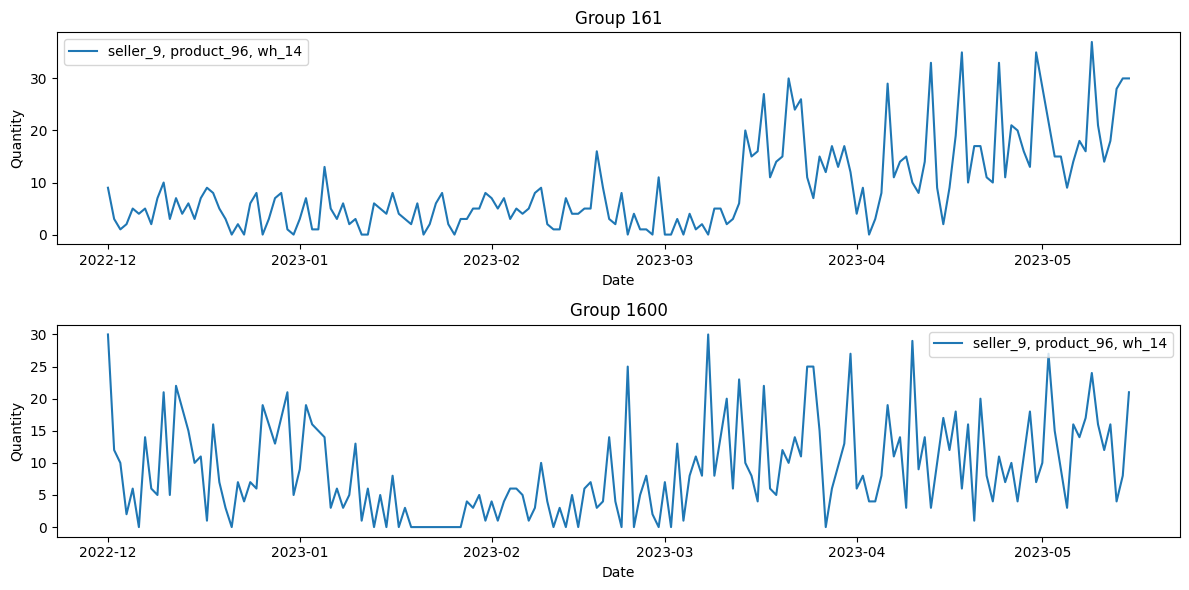

In [30]:
from scipy import stats
import numpy as np
grouped = data.groupby(['seller_no', 'product_no', 'warehouse_no'])

# 初始化一个列表，用于存储每个分组的数据
grouped_data = []


# 遍历每个分组并将数据存储到列表中
for group_name, group_data in grouped:
    # 计算z-score
    group_data['z_score'] = np.abs(stats.zscore(group_data['qty']))
    
    # 将z-score大于3的值视为异常值
    group_data.loc[group_data['z_score'] > 3, 'qty'] = np.nan
    
    # 使用插值替换异常值
    group_data['qty'].interpolate(method='linear', inplace=True)
    
    # 删除我们添加的z_score列
    group_data = group_data.drop(columns='z_score')
    
    # 将处理过的数据添加到列表中
    grouped_data.append(group_data)


# 绘制第161组图像
dates0 = grouped_data[160]['date']
quantities0 = grouped_data[160]['qty']
dates1 = grouped_data[1600]['date']
quantities1 = grouped_data[1600]['qty']    
    # 绘制折线图
# 绘制第161组图像
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 创建第一个子图
plt.plot(dates0, quantities0, label=f'{seller}, {product}, {warehouse}')
plt.title('Group 161')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

# 绘制第1600组图像
plt.subplot(2, 1, 2)  # 创建第二个子图
plt.plot(dates1, quantities1, label=f'{seller}, {product}, {warehouse}')
plt.title('Group 1600')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

plt.tight_layout()  # 调整子图布局
plt.show()


In [31]:
import pandas as pd

# 假设data是你的数据框，'date'是日期列
data['date'] = pd.to_datetime(data['date'])  # 确保日期列是datetime类型


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# 初始化一个列表，用于存储每个模型的性能参数和预测值
model_info_list = []

# 初始化一个DataFrame，用于存储所有预测值
all_predictions = pd.DataFrame()

# 遍历所有组数据
for idx, group_data in enumerate(grouped_data):
    # 使用平均值插值来处理NaN值
    group_data['qty'].fillna(group_data['qty'].mean(), inplace=True)

    # 使用Auto-ARIMA函数选择SARIMA模型的参数
    model = auto_arima(group_data['qty'].values, seasonal=True, m=7)
    
    # 拟合SARIMA模型
    sarima_model = SARIMAX(group_data['qty'].values, order=model.order, seasonal_order=model.seasonal_order)
    sarima_results = sarima_model.fit()
    
    # 预测未来15步
    forecast = sarima_results.get_forecast(steps=15)
    
    # 获取预测值
    predicted_values = forecast.predicted_mean
    
    # 获取前三列的值（seller_no, product_no, warehouse_no）
    group_name = group_data[['seller_no', 'product_no', 'warehouse_no']].iloc[0]
    
    # 创建日期范围（2023-05-16 到 2023-05-30）
    date_range = pd.date_range(start='2023-05-16', periods=15, freq='D')
    
    # 保存最优模型参数
    model_info = {
        'order': model.order,
        'seasonal_order': model.seasonal_order,
        'group_name': group_name,
        'date_range': date_range
    }
    
    model_info_list.append(model_info)
    
    # 将每组的预测值添加到all_predictions DataFrame
    group_prediction = pd.DataFrame({
        'seller_no': group_name[0],
        'product_no': group_name[1],
        'warehouse_no': group_name[2],
        'Date': date_range,
        'Predicted_Qty': predicted_values
    })
    
    all_predictions = pd.concat([all_predictions, group_prediction])

# 保存所有预测值到一个CSV文件
all_predictions.to_csv('结果表1-预测结果表.csv', index=False)

# 打印每组的最优模型参数
for idx, model_info in enumerate(model_info_list):
    print(f'组 {idx+1} 的最优模型参数 - Order: {model_info["order"]}, Seasonal Order: {model_info["seasonal_order"]}')


C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'seller_no': group_name[0],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'product_no': group_name[1],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'warehouse_no': group_name[2],
C:\Users\

组 1 的最优模型参数 - Order: (0, 0, 0), Seasonal Order: (0, 0, 0, 7)
组 2 的最优模型参数 - Order: (1, 0, 1), Seasonal Order: (0, 0, 0, 7)
组 3 的最优模型参数 - Order: (1, 0, 1), Seasonal Order: (0, 0, 0, 7)
组 4 的最优模型参数 - Order: (0, 1, 1), Seasonal Order: (0, 0, 0, 7)
组 5 的最优模型参数 - Order: (1, 0, 2), Seasonal Order: (0, 0, 1, 7)
组 6 的最优模型参数 - Order: (0, 1, 1), Seasonal Order: (0, 0, 0, 7)
组 7 的最优模型参数 - Order: (0, 1, 2), Seasonal Order: (0, 0, 1, 7)
组 8 的最优模型参数 - Order: (1, 1, 1), Seasonal Order: (0, 0, 1, 7)
组 9 的最优模型参数 - Order: (2, 1, 1), Seasonal Order: (0, 0, 0, 7)
组 10 的最优模型参数 - Order: (0, 0, 0), Seasonal Order: (0, 0, 0, 7)
组 11 的最优模型参数 - Order: (0, 1, 1), Seasonal Order: (2, 0, 1, 7)
组 12 的最优模型参数 - Order: (1, 0, 0), Seasonal Order: (0, 0, 0, 7)
组 13 的最优模型参数 - Order: (2, 1, 1), Seasonal Order: (0, 0, 0, 7)
组 14 的最优模型参数 - Order: (2, 0, 2), Seasonal Order: (0, 0, 0, 7)
组 15 的最优模型参数 - Order: (0, 0, 0), Seasonal Order: (0, 0, 0, 7)
组 16 的最优模型参数 - Order: (0, 0, 1), Seasonal Order: (0, 0, 0, 7)
组 17 的最优模型参数 - Or

C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'seller_no': group_name[0],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'product_no': group_name[1],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\1989938660.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'warehouse_no': group_name[2],


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# 初始化一个列表，用于存储每个模型的性能参数和预测值
model_info_list = []

# 初始化一个DataFrame，用于存储所有预测值
all_predictions = pd.DataFrame()

# 遍历所有组数据
for idx, group_data in enumerate(grouped_data):
    # 使用插值来处理NaN值
    group_data['qty'] = group_data['qty'].interpolate(method='linear')

    # 使用Auto-ARIMA函数选择SARIMA模型的参数
    model = auto_arima(group_data['qty'].values, seasonal=True, m=7)
    
    # 拟合SARIMA模型
    sarima_model = SARIMAX(group_data['qty'].values, order=model.order, seasonal_order=model.seasonal_order)
    sarima_results = sarima_model.fit()
    
    # 预测未来15步
    forecast = sarima_results.get_forecast(steps=15)
    
    # 获取预测值
    predicted_values = forecast.predicted_mean
    
    # 获取前三列的值（seller_no, product_no, warehouse_no）
    group_name = group_data[['seller_no', 'product_no', 'warehouse_no']].iloc[0]
    
    # 创建日期范围（2023-05-16 到 2023-05-30）
    date_range = pd.date_range(start='2023-05-16', periods=15, freq='D')
    
    # 保存最优模型参数
    model_info = {
        'order': model.order,
        'seasonal_order': model.seasonal_order,
        'group_name': group_name,
        'date_range': date_range
    }
    
    model_info_list.append(model_info)
    
    # 将每组的预测值添加到all_predictions DataFrame
    group_prediction = pd.DataFrame({
        'seller_no': group_name[0],
        'product_no': group_name[1],
        'warehouse_no': group_name[2],
        'Date': date_range,
        'Predicted_Qty': predicted_values
    })
    
    all_predictions = pd.concat([all_predictions, group_prediction])

# 保存所有预测值到一个CSV文件
all_predictions.to_csv('结果表1-预测结果表.csv', index=False)

# 打印每组的最优模型参数
for idx, model_info in enumerate(model_info_list):
    print(f'组 {idx+1} 的最优模型参数 - Order: {model_info["order"]}, Seasonal Order: {model_info["seasonal_order"]}')


C:\Users\admin\AppData\Local\Temp\ipykernel_1392\4253150621.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'seller_no': group_name[0],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\4253150621.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'product_no': group_name[1],
C:\Users\admin\AppData\Local\Temp\ipykernel_1392\4253150621.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'warehouse_no': group_name[2],
C:\Users\

ValueError: Input contains NaN.